In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data  = pd.read_csv('Insights.csv')

In [3]:
raw_data.fillna(0,inplace=True)

In [4]:
X = raw_data['Qty']
Y = raw_data['Unit Rate In FC']

In [5]:
X.shape

(4973,)

In [6]:
X = X.values.reshape(-1,1)
X.shape

(4973, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [9]:
L.fit(X_train.astype(np.float32),y_train)

LinearRegression()

In [10]:
y_pred = L.predict(X_test)

In [11]:
L.score(X_train,y_train)

0.001654931454667108

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score -0.0027676536621761283
RMSE 62.480411503028606


In [56]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [57]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [58]:
y_predt1 = R.predict(X_test)

In [59]:
print("R2 score",r2_score(y_test,y_predt1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt1)))

R2 score -0.0027676592103733633
RMSE 62.48041167587704


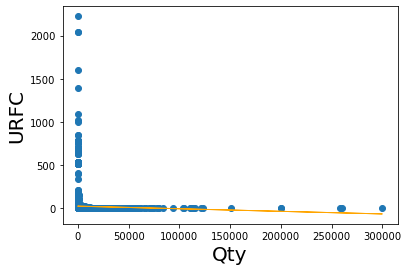

In [60]:
plt.scatter(X,Y)
yhat = -0.0003*X+21.7330
fig = plt.plot(X,yhat,lw=1,c='orange',label='regression line')
plt.xlabel('Qty',fontsize=20)
plt.ylabel('URFC',fontsize= 20)
plt.show()

In [64]:
Y = Y.values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [62]:
X,Y

(array([[  86.],
        [ 710.],
        [ 100.],
        ...,
        [  12.],
        [3032.],
        [  12.]]),
 array([[17.95],
        [ 4.33],
        [23.65],
        ...,
        [ 9.5 ],
        [ 2.9 ],
        [ 9.5 ]]))

1e-15
1e-10
1e-08


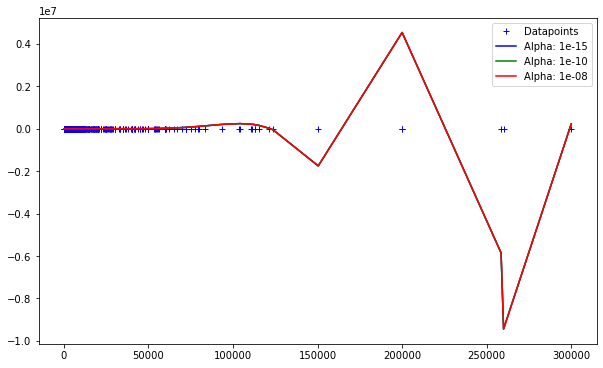

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X, Y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    print(alpha)
    model.fit(X, Y)
    return model.predict(X)

alphas = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
cs = [ 'b','g','r']

plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X, Y, alpha)
    # Plot
    plt.plot(sorted(X[:, 0]), preds[np.argsort(X[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [22]:
preds[np.argsort(X[:, 0])]

array([[ 9.74064673e+02],
       [ 9.74064673e+02],
       [ 9.74064673e+02],
       ...,
       [-5.85330989e+06],
       [-9.43912793e+06],
       [ 2.25869526e+05]])